# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df = pd.read_csv("Index2018.csv")


In [4]:
df1 = df.copy()

# Examining the dataset

In [5]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [8]:
df.shape

(6269, 5)

In [9]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting the data

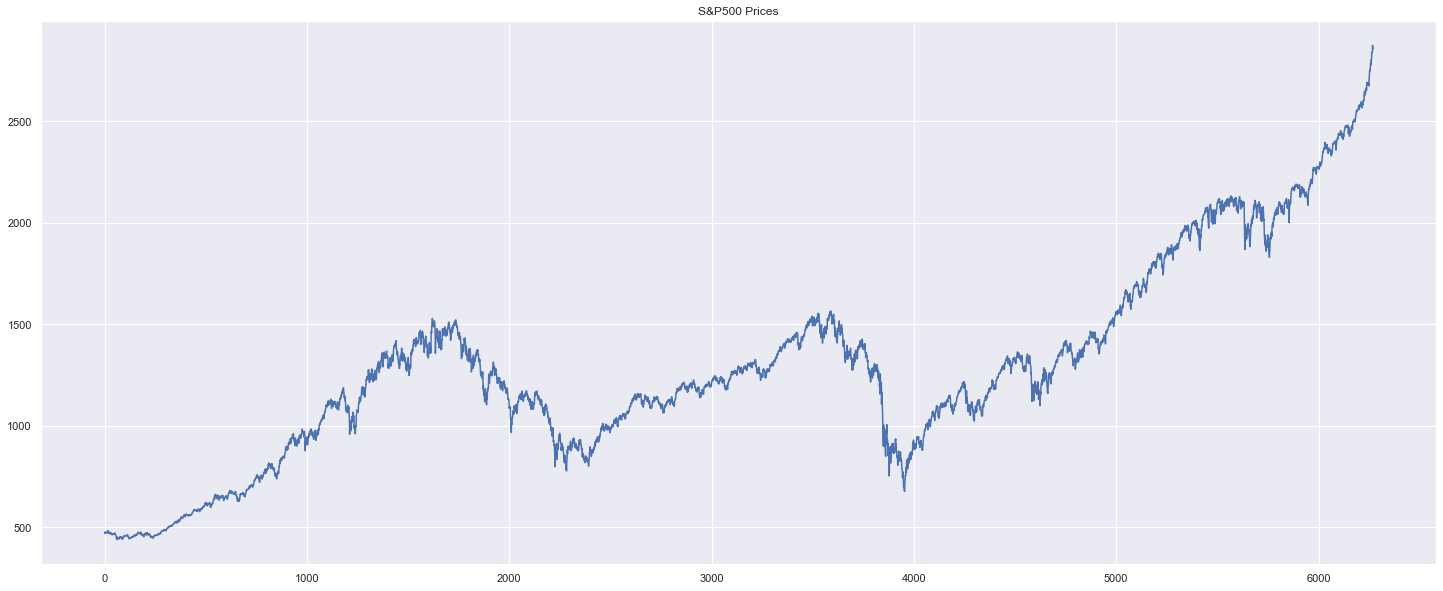

In [10]:
df.spx.plot(figsize=(25,10),title="S&P500 Prices")

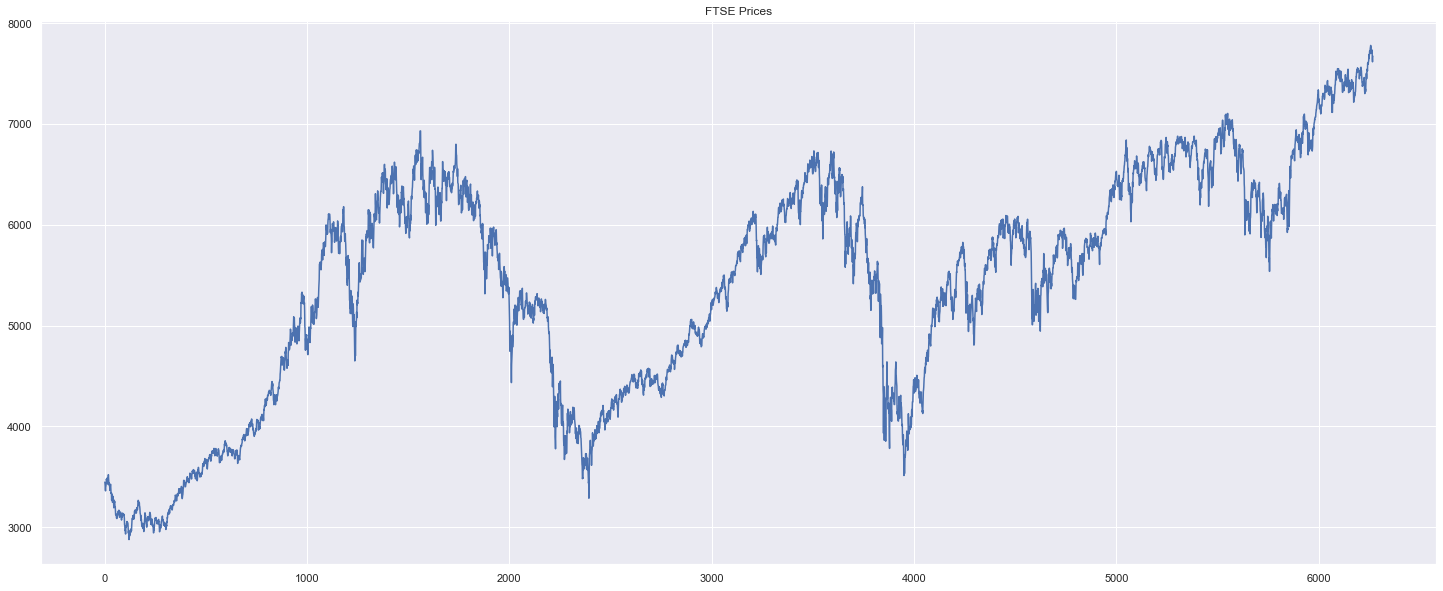

In [11]:
df.ftse.plot(figsize=(25,10),title="FTSE Prices")

Text(0.5, 1.0, 'S&P500 Prices vs FTSE Prices')

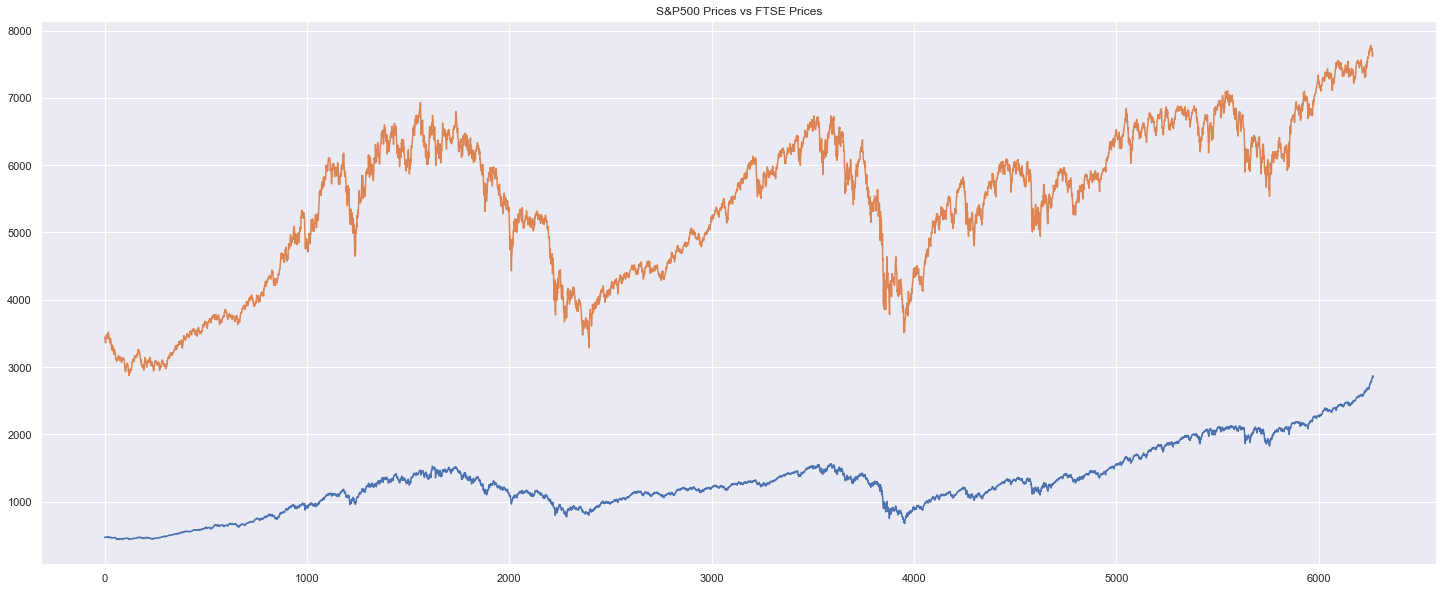

In [12]:
df.spx.plot(figsize=(25,10),title="S&P500 Prices")
df.ftse.plot(figsize=(25,10),title="FTSE Prices")
plt.title("S&P500 Prices vs FTSE Prices")

## The QQ plot
* Used to show if data is distributed in a certain way

In [13]:
import scipy.stats
import pylab

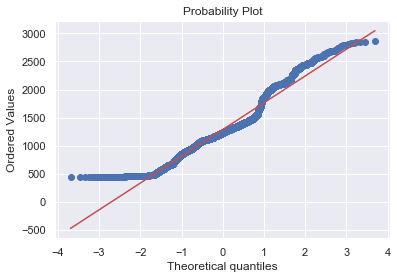

In [14]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()

* The y-axis represents how many std away from the mean the values are
* The x-axis represents th values starting from the lowest to the highest
* The red line shows the path the datapoints follow if they are normally distributed

In [15]:
df.date.describe()

count           6269
unique          6269
top       03/06/1996
freq               1
Name: date, dtype: object

## Changing the date column from string to datetime dtype

In [16]:
df.date = pd.to_datetime(df.date,dayfirst=True)

In [17]:
# Preview of our dataset after transforming it
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

* The above gives summary of the date column
* It give the first to last date of when the data was collected.
* The reason that it also gives the time period is because pandas is equiped to handle high freq data 


## Setting date  as index

In [19]:
df.set_index("date",inplace = True )

In [20]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the frequency

* One can set frequency from 'd' to day,'b' for business days only,'h' for hourly basis & 'm' for monthly basis.However for data that is collected yearly,one sets it as annually ,'a'.

In [21]:
df = df.asfreq('b')

In [22]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26



## Handling missing values

In [23]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Fillna() method
----------------

1.) Front filling method
> Assigns the value of the previous row/period.

2.) Back filling method
> Assigns the value of the next row.

3.) Assigning the same value to all time periods e.g mean
This method is use when the data heavily fluctuates around the mean and is not advisable to use in time-series data




In [24]:
df = df.fillna(method="ffill")

In [25]:
df['market_price'] = df.spx

In [26]:
df.describe()

,spx,dax,ftse,nikkei,market_price
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [27]:
df.head()

,spx,dax,ftse,nikkei,market_price
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [28]:
df.describe()

,spx,dax,ftse,nikkei,market_price
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [29]:
df.drop('spx', axis=1, inplace=True)

In [30]:
df.drop('dax', axis=1, inplace=True)

In [31]:
df.drop('ftse', axis=1, inplace=True)

In [32]:
df.drop('nikkei', axis=1, inplace=True)

In [33]:
df.head()

,market_price
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting data for modelling

* Time-series data should not be shuffled since it should bear its chronological order
* When splitting data,one has to be very careful to ensure that you don't select a very large training data which leads for overfitting or too small which leads to underfitting.
* The most commonly used ratio is the 80/20 split
* By using the len function, we can determine which amount of data  to work with
* With this,we use the iloc function to assign the data for test or train


In [34]:
size = int(len(df)*0.8)

In [35]:
size

5021

In [36]:
df_train = df.iloc[:size]# from the beginning to the last value of size
df_test = df.iloc[size:]# from the last value of size to the end of df

In [37]:
df_train.tail()

,market_price
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [38]:
df_test.head()

,market_price
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White noise
* This is data that doesn't follow a certain pattern thus is unpredictable/ a sequence of random data where every value has a time-period associated with it/behaves sporadically.
* It has a constant mean & variance but no autocorrelation(no relationship between past & present values.
* Autocorrelation checks how correlated a series is with past versions of itself.


In [39]:
wh = np.random.normal(loc = df_train.market_price.mean(),scale = df_train.market_price.std(),size = len(df_train))

In [40]:
df_train['wh'] = wh 

In [41]:
df_train.head()

,market_price,wh
date,,
1994-01-07,469.90,875.363070
1994-01-10,475.27,1030.396092
1994-01-11,474.13,1058.558328
1994-01-12,474.17,1145.285138
1994-01-13,472.47,1250.633362


In [42]:
df_train.describe()

,market_price,wh
count,5021.000000,5021.000000
mean,1091.651926,1092.461829
std,292.559287,287.928855
min,438.920000,113.613649
25%,914.620000,893.427110
50%,1144.650000,1094.684379
75%,1316.280729,1284.388263
max,1570.252238,2102.663974


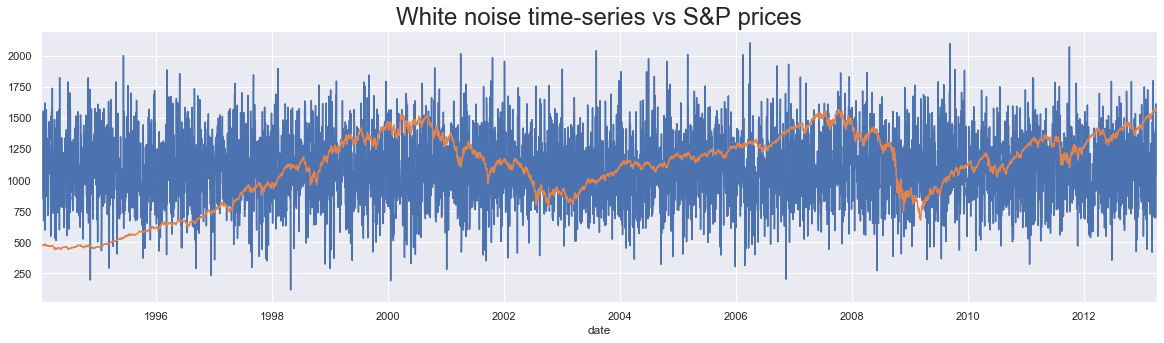

In [43]:
df_train.wh.plot(figsize = (20,5))
df_train.market_price.plot(figsize = (20,5))
plt.title("White noise time-series vs S&P prices",size=24)
plt.show()

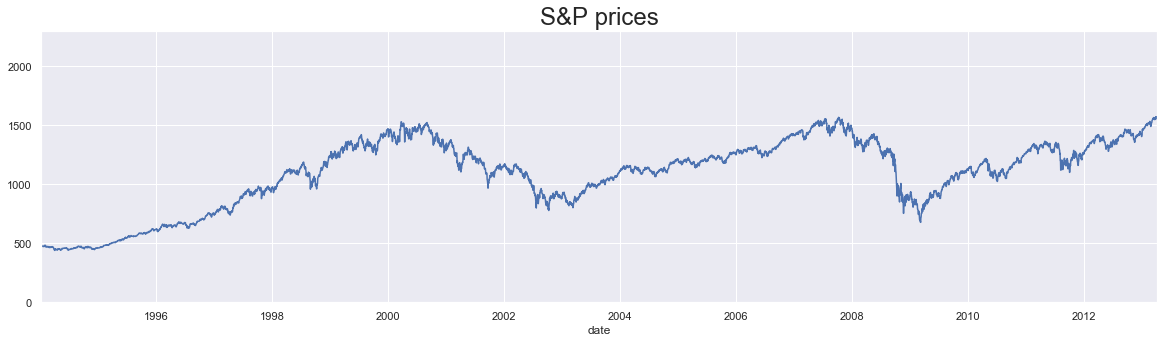

In [44]:
df_train.market_price.plot(figsize = (20,5))
plt.title("S&P prices",size=24)
plt.ylim(0,2300)
plt.show()

## Random Walk
* special type of time series where values tend to persists over time and the differences between periods is simply white noise

In [47]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace = True)
rw = rw.asfreq("b")

In [48]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [49]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [50]:
df["rw"] = rw.price

In [51]:
df.head()

,market_price,rw
date,,
1994-01-07,469.90,1122.139662
1994-01-10,475.27,1080.347860
1994-01-11,474.13,1082.095245
1994-01-12,474.17,1083.639265
1994-01-13,472.47,1067.146255


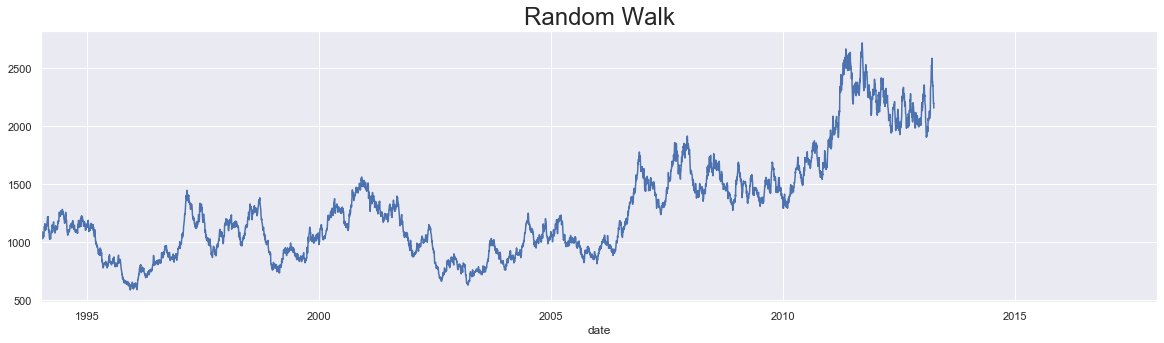

In [52]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk",size= 24)
plt.show()

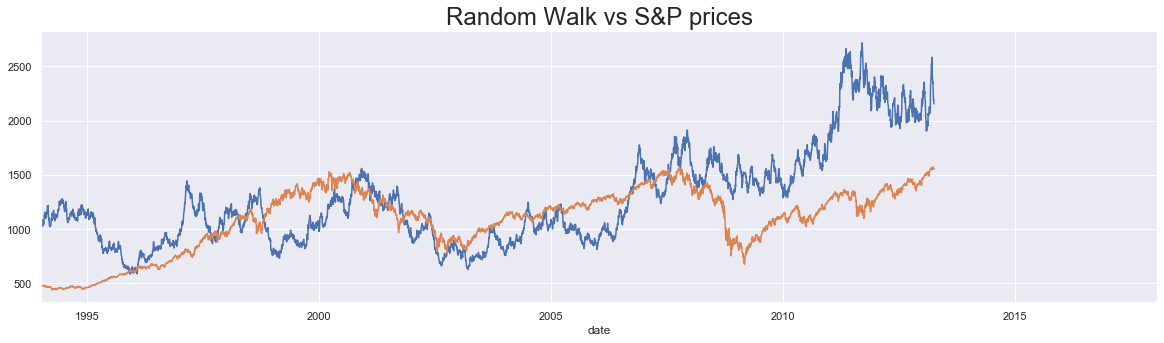

In [53]:
# Comparison of Random Walk &  S&P prices
df.rw.plot(figsize=(20,5))
df_train.market_price.plot(figsize = (20,5))
plt.title("Random Walk vs S&P prices",size= 24)
plt.show()

### Similar features
-----
> * There are small variations between consecutive time periods
> * Both have cyclical increases & decreasesin short periods of time

### Marketing efficiency
Measures the level of difficulty in forecasting correct future values

* If values in finance are random walk data,there will be some difficulty in forecasting correct values.
* When one can forecast corect values,there are arbitrage opportunities.
* Arbitrage is when investors can buy and sell commodities and make a safe profit,while the price adjusts